## 차량리콜 데이터

### 설정 및 데이터 로드

In [3]:

!apt-get update -qq
!apt-get install fonts-nanum* -qq


In [4]:

import pandas as pd
df = pd.read_csv('./sample_data/recall.csv' , encoding="cp949")
df.head(10)


,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유
0,혼다코리아(주),CBR1000RR-R,2021-04-29,2021-05-12,2022-01-03,제작 공정 중 라디에이터 캡의 제조 불량으로 라디에이터 캡과 필러넥이 제대로 밀착되...
1,폭스바겐그룹코리아 주식회사,Polo 5 FL 1.4 TDI BMT,2014-11-17,2014-11-25,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."
2,폭스바겐그룹코리아 주식회사,Jetta 6 FL 2.0 TDI 110PS,2014-11-05,2015-02-26,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."
3,폭스바겐그룹코리아 주식회사,Jetta 1.6 TDI BMT,2011-02-28,2012-09-25,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."
4,폭스바겐그룹코리아 주식회사,Golf A7 1.6 TDI BMT,2014-12-19,2015-02-26,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."
5,폭스바겐그룹코리아 주식회사,Golf 1.6 TDI BMT,2010-07-02,2012-10-01,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."
6,메르세데스벤츠코리아(주),GLC 220 d 4MATIC,2020-08-06,2020-08-06,2022-01-07,크랭크샤프트의 내구성 부족으로 인해 엔진 부하가 높을 경우 크랭크샤프트가 파손될 수...
7,메르세데스벤츠코리아(주),E 220 d 4MATIC,2020-08-26,2020-08-26,2022-01-07,크랭크샤프트의 내구성 부족으로 인해 엔진 부하가 높을 경우 크랭크샤프트가 파손될 수...
8,메르세데스벤츠코리아(주),GLE 350 e 4MATIC Coupe,2020-03-25,2021-01-26,2022-01-07,연료탱크 압력 센서의 고정 클립이 내식성 부족으로 장기간 운행 시 고정 클립이 부식...
9,메르세데스벤츠코리아(주),GLE 350 e 4MATIC,2020-03-27,2021-01-25,2022-01-07,연료탱크 압력 센서의 고정 클립이 내식성 부족으로 장기간 운행 시 고정 클립이 부식...


In [5]:
#결측값 시각화
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm # Import the fontManager
import seaborn as sns
import missingno as msno # Import the missingno library

font_dirs=['/usr/share/fonts/truetype/nanum']
font_files=fm.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
  fm.fontManager.addfont(font_file)

sns.set(font="NanumBarunGothic", rc={"axes.unicode_minus":False})


In [6]:
# 결측치 확인하기
df.info()

df=df.drop_duplicates()
print(len(df))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1419 entries, 0 to 1418
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   제작자       1419 non-null   object
 1   차명        1419 non-null   object
 2   생산기간(부터)  1419 non-null   object
 3   생산기간(까지)  1419 non-null   object
 4   리콜개시일     1419 non-null   object
 5   리콜사유      1419 non-null   object
dtypes: object(6)
memory usage: 66.6+ KB
1414


### 회사별 리콜 수

<ipython-input-7-ee25e0a04ef3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  p = sns.barplot(x = '제작자', y='리콜수', data=top_20_company, palette='viridis')
<ipython-input-7-ee25e0a04ef3>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_xticklabels(p.get_xticklabels(), rotation=90)


[Text(0, 0, '비엠더블유코리아(주)'),
 Text(1, 0, '메르세데스벤츠코리아(주)'),
 Text(2, 0, '폭스바겐그룹코리아 주식회사'),
 Text(3, 0, '현대자동차(주)'),
 Text(4, 0, '만트럭버스코리아(주)'),
 Text(5, 0, '기아주식회사'),
 Text(6, 0, '포드세일즈서비스코리아(유)'),
 Text(7, 0, '(주)에프엠케이'),
 Text(8, 0, '스텔란티스코리아주식회사'),
 Text(9, 0, '(주)재규어랜드로버코리아'),
 Text(10, 0, '(유)기흥모터스'),
 Text(11, 0, '테슬라코리아 유한회사'),
 Text(12, 0, '포르쉐코리아 주식회사'),
 Text(13, 0, '화창상사(주)'),
 Text(14, 0, '혼다코리아(주)'),
 Text(15, 0, '(주)볼보자동차코리아'),
 Text(16, 0, '스카니아코리아그룹(주)'),
 Text(17, 0, '다임러트럭코리아(주)'),
 Text(18, 0, '르노코리아자동차 주식회사'),
 Text(19, 0, '(주)피라인')]

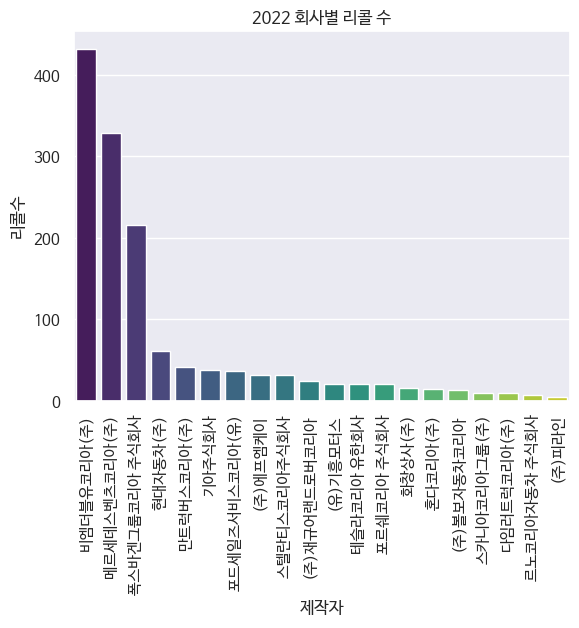

In [7]:
# 2022 회사별 리콜 수 10개
top_20_company = pd.DataFrame(df['제작자'].value_counts()[:20])

top_20_company.rename(columns = {'count' : '리콜수'}, inplace=True)

p = sns.barplot(x = '제작자', y='리콜수', data=top_20_company, palette='viridis')
p.set_title('2022 회사별 리콜 수')
p.set_xticklabels(p.get_xticklabels(), rotation=90)


### 차량별 리콜 수

<ipython-input-8-19d88c18a7f6>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  p = sns.barplot(x = '차명', y='리콜수', data=top_20_car, palette='viridis')
<ipython-input-8-19d88c18a7f6>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_xticklabels(p.get_xticklabels(), rotation=90)


[Text(0, 0, '328i'),
 Text(1, 0, 'TGX'),
 Text(2, 0, 'TGS'),
 Text(3, 0, 'C 300'),
 Text(4, 0, '328xi'),
 Text(5, 0, 'S 350 d'),
 Text(6, 0, 'S 580 4MATIC'),
 Text(7, 0, 'GLE 300 d 4MATIC'),
 Text(8, 0, 'Maybach S 580 4MATIC'),
 Text(9, 0, 'S 500 4MATIC'),
 Text(10, 0, 'S 400 d 4MATIC'),
 Text(11, 0, 'C 200 4MATIC'),
 Text(12, 0, 'Model 3'),
 Text(13, 0, '520d'),
 Text(14, 0, '스카니아카고'),
 Text(15, 0, '520d xDrive'),
 Text(16, 0, 'E 450 4MATIC'),
 Text(17, 0, 'BMW X3 xDrive20d M Sport Package'),
 Text(18, 0, 'EQS 450+'),
 Text(19, 0, 'GLC 300 4MATIC')]

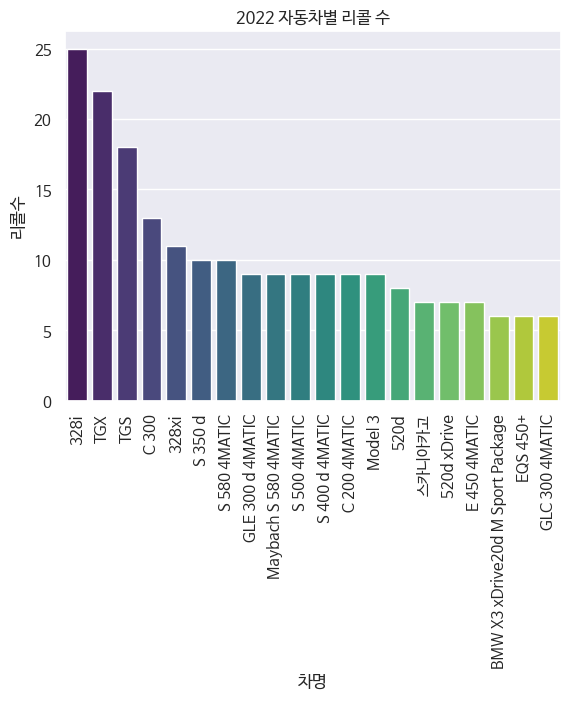

In [8]:
# 2022 리콜 차량 20개
top_20_car = pd.DataFrame(df['차명'].value_counts()[:20])

top_20_car
top_20_car.rename(columns = {'count' : '리콜수'}, inplace=True)

p = sns.barplot(x = '차명', y='리콜수', data=top_20_car, palette='viridis')
p.set_title('2022 자동차별 리콜 수')
p.set_xticklabels(p.get_xticklabels(), rotation=90)

### 리콜 사유 워드클라우드

In [11]:
try:
  from wordcloud import WordCloud, STOPWORDS
except:
  !pip install wordcloud
  from wordcloud import WordCloud, STOPWORDS


spwords= set(["않습니다", "있어", "있음", "않아", "기준에", "관한", "및", "의", "동안","인하여","있는","경우","있습니다","가능성이","가","될","이","에","인해","수","중","시","또는", "않을"])

In [12]:
df_reason = df[['리콜사유']].drop_duplicates()

reason = ''''''

for d in df_reason.values:
  reason += d[0] + ' '

reason

'제작 공정 중 라디에이터 캡의 제조 불량으로 라디에이터 캡과 필러넥이 제대로 밀착되지 않아 라디에이터 내부 압력을 일정하게 유지할 수 없습니다. 이로 인해 라디에이터 내부 압력이 높아지면 냉각수 저장 탱크의 오버플로 튜브에서 냉각수가 분출될 수 있습니다. 특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 내 오일 압력 생성기(어큐뮬레이터)의 나사산이 날카롭게 가공되어, 사용 기간 중 어큐뮬레이터 하우징에 미세 균열이 발생하여 충분한 변속 압력 생성에 지장을 줄 가능성이 있습니다. 크랭크샤프트의 내구성 부족으로 인해 엔진 부하가 높을 경우 크랭크샤프트가 파손될 수 있습니다. 연료탱크 압력 센서의 고정 클립이 내식성 부족으로 장기간 운행 시 고정 클립이 부식될 수 있고, 고정력이 상실되어 연료 탱크 압력 센서가 헐거워질 수도 있습니다. 일부 대상 차량의 엔진컨트롤유닛 소프트웨어 오류로 EGR(배기가스 재순환 장치) 배관 내 온도가 상승할 수 있습니다. 또한 EGR 쿨러 (배기가스 재순환 냉각기)의 내구성 부족에 의한 미세 균열로 냉각수가 누수 될 수 있습니다. BMW 자체 품질 조사 결과 2021년 11월 22일부터 2021년 11월 30일까지 제작된 BMW i4 eDrive40, i4 M50 차량 72대의 차량 생산 과정에서 고전압 배터리 충격 완화 패드*가 장착되지 않았을 가능성을 확인하였습니다. *고전압 배터리 충격 완화 패드: 배터리와 차대 사이에 장착되어 측면 충돌 시 차대가 고전압 배터리에 손상을 입히는 것을 최소화하는 장치 엔진 컨트롤 유닛의 소프트웨어 오류로 인해 엔진 시동 후 차량 도난방지 장치(vehicle immobilizer)의 데이터를 엔진 컨트롤 유닛에 저장하지 못할 수 있습니다. 파워트레인 컨트롤 유닛의 소프트웨어 오류로 인해 차량 운행 중 파워트레인 컨트롤 유닛이 의도하지 않게 재부팅될 수 있습니다. 메인 퓨즈 박스의 공급업체의 신규 조립공장에서 생산 초기에 공정의 문제(퓨즈 고정 너트 조임시 퓨즈의 

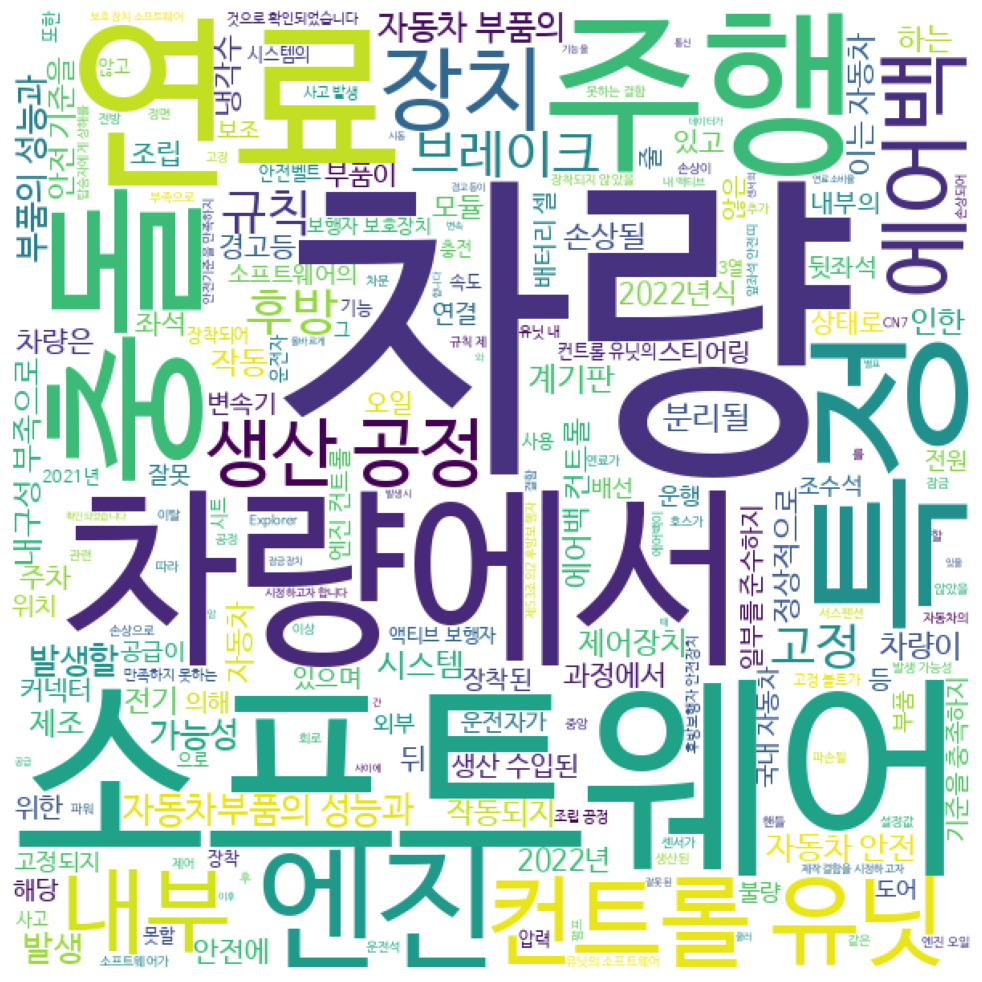

In [14]:

spwords= set(["이러한", "일부", "차량의", "오류로","불량으로", "이로", "발생을", "지장을", "발생하고", "되지", "기간", "제대로", "않습니다", "있어", "있음", "않아", "기준에", "관한", "및", "의", "동안","인하여","있는","경우","있습니다","가능성이","가","될","이","에","인해","수","중","시","또는", "않을"])

wc1=WordCloud(max_font_size=200,
              stopwords=spwords,
              font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
              background_color='white',
              width=600,
              height=600).generate(reason)
plt.figure(figsize=(10,10))
plt.imshow(wc1)
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()

### 자리바꿔서 데이터 분석

In [60]:
import pandas as pd
df = pd.read_csv('./sample_data/jeju.csv' , encoding="cp949")
df = df[df['시도명'] == '제주시']
df

,일자,시도명,읍면동명,거주인구,근무인구,방문인구,총 유동인구,교통량,평균 속도,평균 소요 시간,평균 기온,일강수량,평균 풍속,데이터기준일자
12848,2018-01-01,제주시,건입동,174544.301,19772.091,191560.904,385877.295,393.400,33.600,43.400,0.800,0.0,2.600,2020-12-15
12849,2018-01-02,제주시,건입동,166314.614,26391.276,163786.671,356492.561,471.200,32.000,46.600,1.000,0.0,1.500,2020-12-15
12850,2018-01-03,제주시,건입동,165105.830,25732.876,156549.258,347387.964,450.600,32.000,44.800,0.000,0.0,3.400,2020-12-15
12851,2018-01-04,제주시,건입동,159168.771,26404.039,164116.487,349689.296,438.000,30.800,46.400,-1.100,1.0,2.100,2020-12-15
12852,2018-01-05,제주시,건입동,163381.827,25005.131,160446.693,348833.651,454.800,31.200,46.400,-0.400,4.5,3.200,2020-12-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32064,2020-04-26,제주시,화북동,609825.951,23606.299,195321.303,828753.553,968.647,38.971,28.824,10.867,0.0,2.733,2020-12-15
32065,2020-04-27,제주시,화북동,590585.828,41293.221,192992.291,824871.340,1284.588,36.735,31.441,10.700,0.0,2.900,2020-12-15
32066,2020-04-28,제주시,화북동,588189.415,42228.414,196053.574,826471.404,1306.324,36.676,30.971,11.367,0.0,3.067,2020-12-15
32067,2020-04-29,제주시,화북동,581854.765,41445.253,198362.285,821662.304,1318.000,36.765,30.853,12.767,0.0,2.467,2020-12-15


In [32]:
people = df[['읍면동명', '거주인구', '근무인구', '방문인구', '총 유동인구']]

people

df = people.groupby('읍면동명').mean().astype(int)

df


,거주인구,근무인구,방문인구,총 유동인구
읍면동명,,,,
건입동,150303,20720,160931,331955
구좌읍,278302,30717,188030,497051
노형동,1192569,136677,515864,1845112
도두동,27595,4970,95614,128180
봉개동,81292,20026,104275,205594
삼도1동,206151,17076,144268,367496
삼도2동,100813,15376,136793,252983
삼양동,458475,19924,114283,592682
아라동,840062,128171,326740,1294974


In [ ]:
# @title 거주인구

from matplotlib import pyplot as plt
people_mean['거주인구'].plot(kind='hist', bins=20, title='거주인구')
plt.gca().spines[['top', 'right',]].set_visible(False)

<ipython-input-38-60f345d5156c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  p = sns.barplot(x = '읍면동명', y='거주인구', data=df, palette='viridis')
<ipython-input-38-60f345d5156c>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_xticklabels(p.get_xticklabels(), rotation=90)


[Text(0, 0, '건입동'),
 Text(1, 0, '구좌읍'),
 Text(2, 0, '노형동'),
 Text(3, 0, '도두동'),
 Text(4, 0, '봉개동'),
 Text(5, 0, '삼도1동'),
 Text(6, 0, '삼도2동'),
 Text(7, 0, '삼양동'),
 Text(8, 0, '아라동'),
 Text(9, 0, '애월읍'),
 Text(10, 0, '연동'),
 Text(11, 0, '오라동'),
 Text(12, 0, '외도동'),
 Text(13, 0, '용담1동'),
 Text(14, 0, '용담2동'),
 Text(15, 0, '이도1동'),
 Text(16, 0, '이도2동'),
 Text(17, 0, '이호동'),
 Text(18, 0, '일도1동'),
 Text(19, 0, '일도2동'),
 Text(20, 0, '조천읍'),
 Text(21, 0, '한경면'),
 Text(22, 0, '한림읍'),
 Text(23, 0, '화북동')]

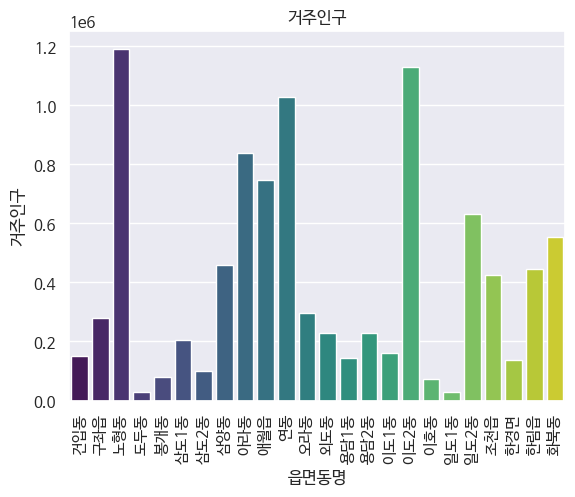

In [38]:
p = sns.barplot(x = '읍면동명', y='거주인구', data=df, palette='viridis')
p.set_title('거주인구')
p.set_xticklabels(p.get_xticklabels(), rotation=90)




<ipython-input-39-a88678149430>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  p = sns.barplot(x = '거주인구', y='읍면동명', data=df, palette='viridis')
<ipython-input-39-a88678149430>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_xticklabels(p.get_xticklabels(), rotation=90)


[Text(0.0, 0, '0.0'),
 Text(200000.0, 0, '0.2'),
 Text(400000.0, 0, '0.4'),
 Text(600000.0, 0, '0.6'),
 Text(800000.0, 0, '0.8'),
 Text(1000000.0, 0, '1.0'),
 Text(1200000.0, 0, '1.2'),
 Text(1400000.0, 0, '1.4')]

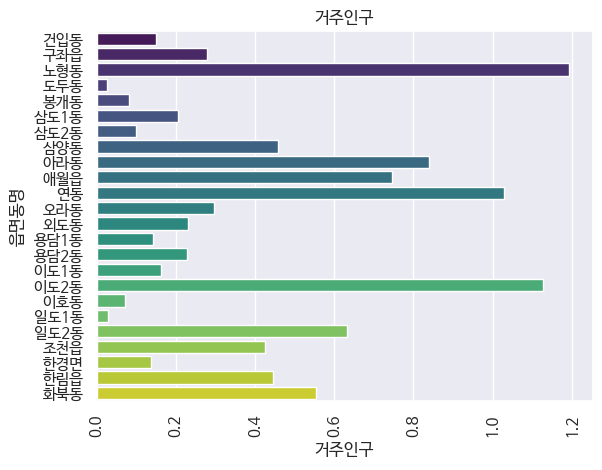

In [50]:
# max_val = df.max(numeric_only=True).max()
# min_val = df.min(numeric_only=True).min()

max_val = df['거주인구'].max()+100000
min_val = df['거주인구'].min()



max_val, min_val

(1292569, 27595)

<ipython-input-58-d4031b0d2e82>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], data=df, x='거주인구', y='읍면동명', palette='viridis')
<ipython-input-58-d4031b0d2e82>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], data=df, x='근무인구', y='읍면동명', palette='viridis')
<ipython-input-58-d4031b0d2e82>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[2], data=df, x='방문인구', y='읍면동명', palette='viridis')


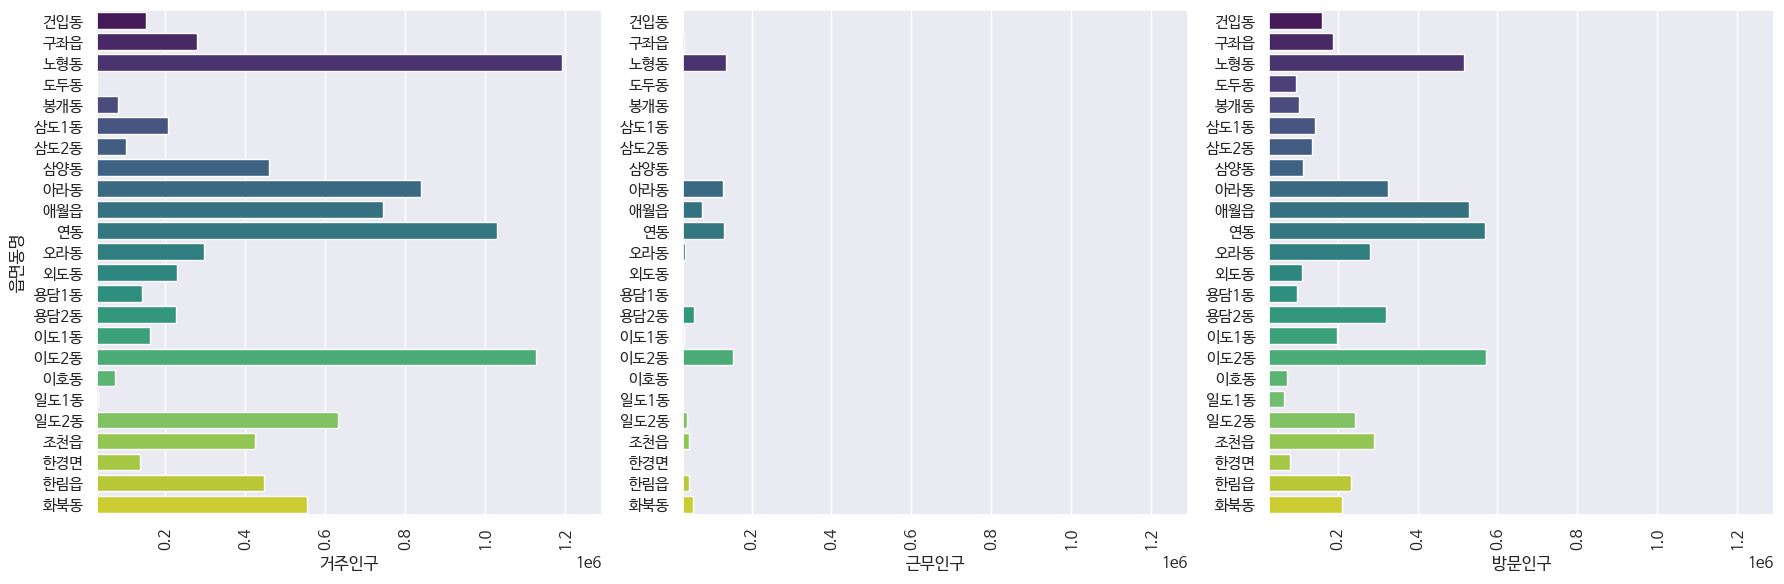

In [58]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))


# 거주인구
sns.barplot(ax=axes[0], data=df, x='거주인구', y='읍면동명', palette='viridis')
# axes[0].set_title('거주인구')
axes[0].set_xlabel('거주인구')
axes[0].set_ylabel('읍면동명')
axes[0].set(xlim=(min_val, max_val))
axes[0].tick_params(axis='x', rotation=90)


# 근무인구
sns.barplot(ax=axes[1], data=df, x='근무인구', y='읍면동명', palette='viridis')
# axes[1].set_title('근무인구')
axes[1].set_xlabel('근무인구')
# axes[1].set_ylabel('읍면동명')
axes[1].set_ylabel('')
axes[1].set(xlim=(min_val, max_val))
axes[1].tick_params(axis='x', rotation=90)


# 방문인구
sns.barplot(ax=axes[2], data=df, x='방문인구', y='읍면동명', palette='viridis')
# axes[2].set_title('방문인구')
axes[2].set_xlabel('방문인구')
axes[2].set_ylabel('')
axes[2].set(xlim=(min_val, max_val))
axes[2].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

<ipython-input-61-bc3220d84149>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], data=df, x='거주인구', y='읍면동명', palette='viridis')
<ipython-input-61-bc3220d84149>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], data=df, x='근무인구', y='읍면동명', palette='viridis')
<ipython-input-61-bc3220d84149>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[2], data=df, x='방문인구', y='읍면동명', palette='viridis')


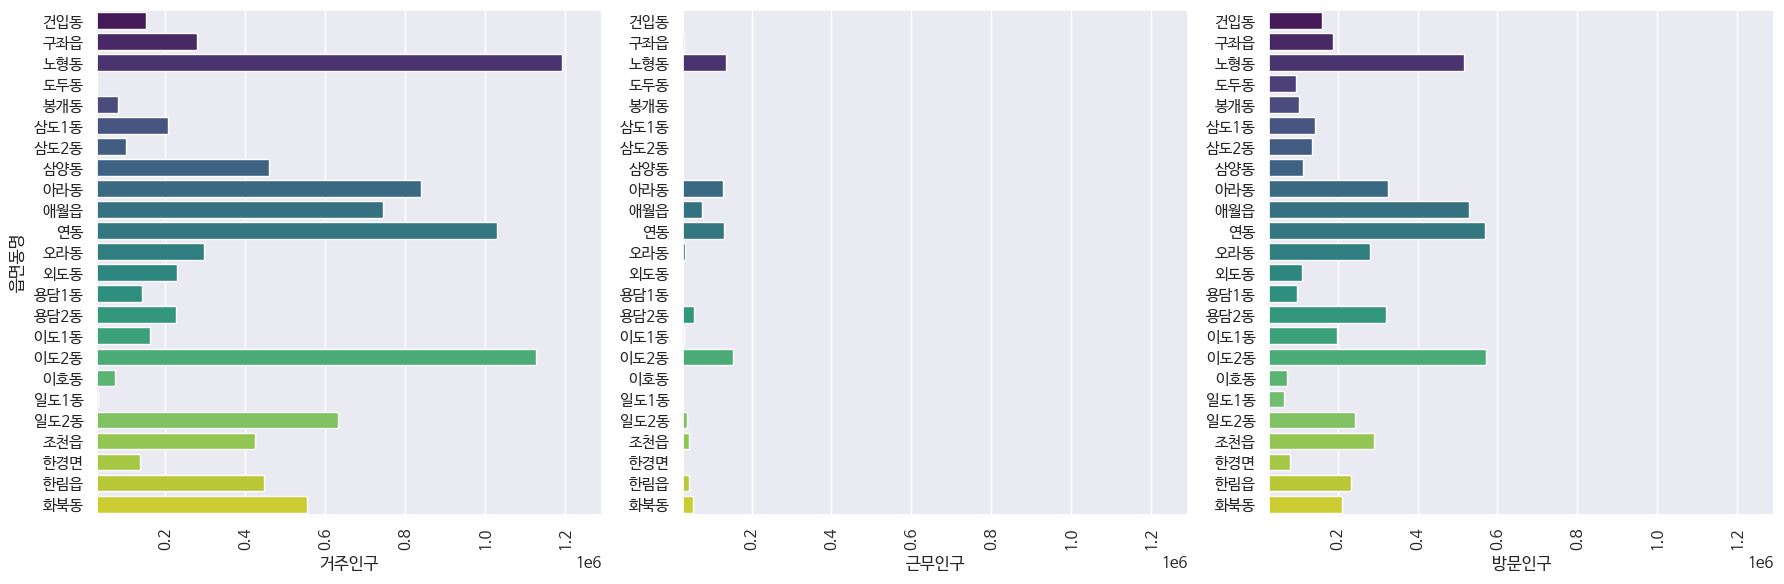

In [61]:
df = df[df['시도명'] == '제주시']
people = df[['읍면동명', '거주인구', '근무인구', '방문인구', '총 유동인구']]
df = people.groupby('읍면동명').mean().astype(int)

max_val = df['거주인구'].max()+100000
min_val = df['거주인구'].min()


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))


# 거주인구
sns.barplot(ax=axes[0], data=df, x='거주인구', y='읍면동명', palette='viridis')
# axes[0].set_title('거주인구')
axes[0].set_xlabel('거주인구')
axes[0].set_ylabel('읍면동명')
axes[0].set(xlim=(min_val, max_val))
axes[0].tick_params(axis='x', rotation=90)


# 근무인구
sns.barplot(ax=axes[1], data=df, x='근무인구', y='읍면동명', palette='viridis')
# axes[1].set_title('근무인구')
axes[1].set_xlabel('근무인구')
# axes[1].set_ylabel('읍면동명')
axes[1].set_ylabel('')
axes[1].set(xlim=(min_val, max_val))
axes[1].tick_params(axis='x', rotation=90)


# 방문인구
sns.barplot(ax=axes[2], data=df, x='방문인구', y='읍면동명', palette='viridis')
# axes[2].set_title('방문인구')
axes[2].set_xlabel('방문인구')
axes[2].set_ylabel('')
axes[2].set(xlim=(min_val, max_val))
axes[2].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

